In [2]:
import os
import pandas as pd
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras. layers import Dense, Flatten
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
mkdir %USERPROFILE%\.kaggle


In [7]:
!cp kaggle.json ~/.kaggle

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten

HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/metadata/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002583D176490>, 'Connection to www.kaggle.com timed out. (connect timeout=None)'))


In [12]:
!unzip /dataset/fruit-and-vegetable-disease-healthy-vs-rotten.zip

unzip:  cannot find either /dataset/fruit-and-vegetable-disease-healthy-vs-rotten.zip or /dataset/fruit-and-vegetable-disease-healthy-vs-rotten.zip.zip.


In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set paths
dataset_dir = 'dataset/fruit-and-vegetable-disease-healthy-vs-rotten'
output_dir = 'output_dataset'

# Get class folders (skip non-directories just in case)
classes = [cls for cls in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, cls))]

# Create output directory structure
for split in ['train', 'val', 'test']:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Split and copy files
for cls in classes:
    class_dir = os.path.join(dataset_dir, cls)

    # Get valid image files only
    images = [img for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))]

    if len(images) == 0:
        print(f"⚠️ Skipping class '{cls}' — no valid images found.")
        continue

    print(f"📂 Class: {cls} — {len(images)} images")

    # Split (70% train, 15% val, 15% test)
    train_val, test = train_test_split(images, test_size=0.15, random_state=42)
    train, val = train_test_split(train_val, test_size=0.1765, random_state=42)  # 15% of 85%

    # Copy files to respective folders
    for img in train:
        shutil.copy2(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val:
        shutil.copy2(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test:
        shutil.copy2(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("\n✅ Dataset successfully split into 'train', 'val', and 'test' folders.")


⚠️ Skipping class 'healthy' — no valid images found.
⚠️ Skipping class 'rotten' — no valid images found.

✅ Dataset successfully split into 'train', 'val', and 'test' folders.


In [15]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
dataset_dir = 'output_dataset'  # <-- Corrected path
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print("Train classes:", train_generator.class_indices)
print("Validation classes:", val_generator.class_indices)
print("Test classes:", test_generator.class_indices)


Found 20771 images belonging to 28 classes.
Found 5415 images belonging to 28 classes.
Found 3615 images belonging to 28 classes.
Train classes: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
Validation classes: {'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__He

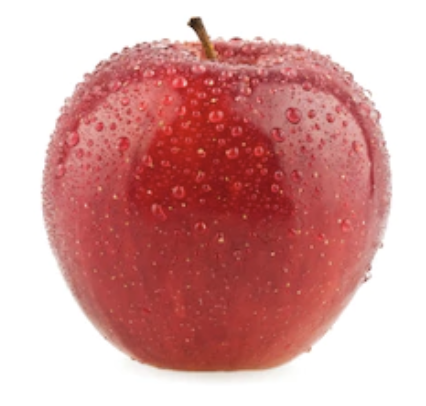

In [24]:
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = 'output_dataset/train/Apple__Healthy'
# Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path. join(folder_path, selected_image)
display(Image(filename=image_path))

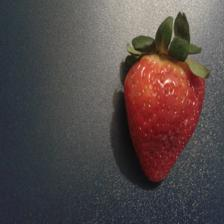

In [25]:
# Specify the path to your image folder
folder_path = 'output_dataset/test/Strawberry__Healthy'

# Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path. join(folder_path, selected_image)
display(Image(filename=image_path))

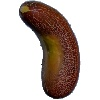

In [26]:
# Specify the path to your image folder
folder_path = 'output_dataset/test/Cucumber__Rotten'

# Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

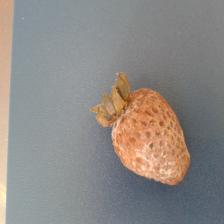

In [27]:
# Specify the path to your image folder
folder_path = 'output_dataset/test/Strawberry__Rotten'

# Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
# Select a random image from the list
selected_image = random.choice(image_files)
# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [28]:
trainpath = "output_dataset/train"
testpath= "output_dataset/test"

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 20) ,#5 ,15, 32, 50

Found 20771 images belonging to 28 classes.
Found 3615 images belonging to 28 classes.


In [31]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [32]:
from tensorflow.keras.applications import VGG16

vgg = VGG16(include_top=False, input_shape=(224, 224, 3))


In [33]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [34]:
len(vgg.layers)

19

In [35]:
for layer in vgg.layers:
    layer.trainable = False

In [36]:
x= Flatten()(vgg.output)

In [37]:
output = Dense(28, activation ='softmax')(x)

In [38]:
vgg16 = Model(vgg.input,output)

In [39]:
vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)  
 
# Assuming you have defined your VGG16 model as vgg16
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
# Compile the model (you may have already done this)
vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# # Train the model with early stopping callback
history = vgg16.fit(train, validation_data=test,
                    epochs=15,
                 steps_per_epoch=20,
              callbacks=[early_stopping])

Epoch 1/15


c:\Users\YoshithaPuchalapalli\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1402 - loss: 4.2502

c:\Users\YoshithaPuchalapalli\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1164s 61s/step - accuracy: 0.1439 - loss: 4.2233 - val_accuracy: 0.3093 - val_loss: 2.4538
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1042s 55s/step - accuracy: 0.4023 - loss: 2.1377 - val_accuracy: 0.4174 - val_loss: 2.5647
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1331s 70s/step - accuracy: 0.5078 - loss: 1.8736 - val_accuracy: 0.4797 - val_loss: 1.9775
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1411s 74s/step - accuracy: 0.6015 - loss: 1.5347 - val_accuracy: 0.5256 - val_loss: 2.0306
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1432s 75s/step - accuracy: 0.5895 - loss: 1.3390 - val_accuracy: 0.5237 - val_loss: 1.8555
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1833s 96s/step - accuracy: 0.6652 - loss: 1.1078 - val_accuracy: 0.5568 - val_loss: 1.6855
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1031s 54s/step - accuracy: 0.6958 - loss: 1.1257 - val_accuracy: 0.6044 - val_loss: 1.5781
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1071s 56s/step - accuracy: 0.7243 - loss: 1.0582 - val_accuracy: 0.573

In [41]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

In [42]:
img_path = 'output_dataset/train/Bellpepper__Healthy/freshPepper (140).jpg'

In [43]:
import numpy as np
img = load_img(img_path,target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
labels[np.argmax(preds) ]

4

In [45]:
img_path = 'output_dataset/train/Mango__Rotten/980.jpg'

In [46]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input (x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.5634510e-22, 9.9370980e-01, 3.5051986e-34, 5.5376203e-03,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.4280850e-30, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 7.5255806e-04, 0.0000000e+00, 1.0293553e-33,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.0422678e-35, 3.9796571e-28, 0.0000000e+00]],
      dtype=float32)

In [47]:
labels[np.argmax(preds) ]

1

In [48]:
img_path ='output_dataset/train/Orange__Healthy/rotated_by_15_Screen Shot 2018-06-13 at 12.10.10 AM.png'

In [49]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input (x)
preds = vgg16.predict (np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.6832481e-15, 0.0000000e+00, 1.9393688e-35, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.5741858e-25, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [50]:
labels[np.argmax(preds)]

24

In [51]:
img_path ='output_dataset/train/Cucumber__Healthy/freshCucumber (203).jpg'

In [52]:
import numpy as np
img = load_img(img_path,target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input (x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
labels[np.argmax(preds)]

8

In [54]:
img_path ='output_dataset/train/Potato__Rotten/rottenPotato (189).jpg'

In [55]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict (np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.0000000e+00, 1.7372137e-11, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [56]:
labels[np.argmax(preds)]

17

In [57]:
vgg16.save('cnn_best_model.h5')